In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("./data/Admission_Predict.csv")

def ConvertToClasses(i):
    if(i>=0.6):
        return 1 
    return 0 #else

df["Chance of Admit "] = df["Chance of Admit "].apply(ConvertToClasses)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,1


In [22]:
X = np.array(df.iloc[:, [1,2]])
Y = np.array(df.iloc[:, 8])

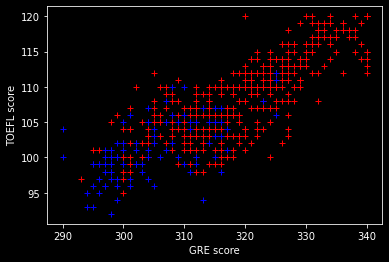

In [23]:
accepted = X[Y==1]
rejected = X[Y==0]
plt.style.use("dark_background")
plt.plot(accepted[:, 0], accepted[:, 1], "r+")
plt.plot(rejected[:, 0], rejected[:, 1], "b+")
plt.xlabel("GRE score")
plt.ylabel("TOEFL score")
plt.show()

In [24]:
def FeatureScaling(X):
    FeatureScaleMean = X.mean()
    FeatureScaleStd = np.std(X)
    X = (X - FeatureScaleMean) / FeatureScaleStd
    return X, FeatureScaleMean, FeatureScaleStd

In [63]:
def cost(X, Y, m):
    NDataPoints = len(X)
    total_cost = 0
    for i in range(NDataPoints):
        z = np.dot(m, X[i])
        total_cost += (1/NDataPoints) * ( np.log(1 + np.exp(-1*z)) + z - Y[i]*z)
    return total_cost

In [64]:
def minibatch_gradient_descent(X, Y, n_iterations, learning_rate, batch_size):
    df = pd.DataFrame(X)
    df["bias"]=1
    X = np.array(df)
    NFeatures = len(X[0])
    m = np.zeros(NFeatures)
    NDataPoints = len(X)
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        slope_m = 0
        for j in range(NDataPoints):
            hX = 1 / (1 + np.exp(-1* np.dot(m, X[j])) ) # Activation function = sigmoid
            slope_m += (-1/NDataPoints) * np.dot( Y[j] - hX , X[j])
            if(j % batch_size==0):
                m -= learning_rate * slope_m
        cost_history[i] = cost(X, Y, m)
    return m, cost_history

In [65]:
n_iterations = 1000
learning_rate = 0.75
batch_size = 10

X, FeatureScaleMean, FeatureScaleStd = FeatureScaling(X)
m, cost_history = minibatch_gradient_descent(X, Y, n_iterations, learning_rate, batch_size)

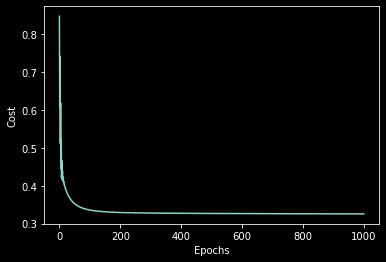

0.3257022947391603


In [66]:
plt.plot(range(len(cost_history)), cost_history)
plt.style.use("dark_background")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
print(cost_history[-1])

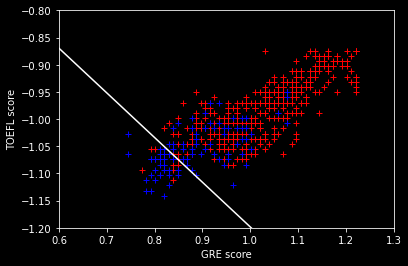

In [10]:
accepted = X[Y==1]
rejected = X[Y==0]
plt.style.use("dark_background")
plt.plot(accepted[:, 0], accepted[:, 1], "r+")
plt.plot(rejected[:, 0], rejected[:, 1], "b+")
y1 = -1*(m[0]*0.6 + m[2])/m[1]
y2 = -1*(m[0]*1.3 + m[2])/m[1]
plt.plot([0.6, 1.3], [y1, y2], "w-")
plt.axis([0.6, 1.3, -1.2, -0.8])
plt.xlabel("GRE score")
plt.ylabel("TOEFL score")
plt.show()

In [25]:
"""
Vectorised Method
"""
X, FeatureScaleMean, FeatureScaleStd = FeatureScaling(X)
X = np.asmatrix(X).T
Y = np.asmatrix(Y).T


In [26]:
W = np.ones(X.shape[0]).reshape(X.shape[0], 1)
b=1

In [45]:
n_iterations = 1000
lr= 0.01
history = np.array([])
for i in range(n_iterations):
    hx = (1/(1 + np.exp(-W.T*X - b))).T    
    J = -1 * Y.T * np.log(hx) - 1* (1-Y.T) * np.log(1- hx)
    history = np.append(history, [J])
    W -= lr * X * (hx - Y)
    b -= lr * (hx-Y).sum()

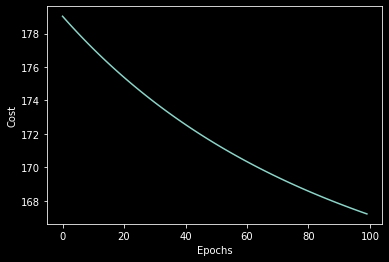

167.2197587802918


In [44]:
plt.plot(range(len(history)), history)
plt.style.use("dark_background")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
print(history[-1])

In [16]:
X = pd.DataFrame(X.T)
Y = pd.DataFrame(Y)

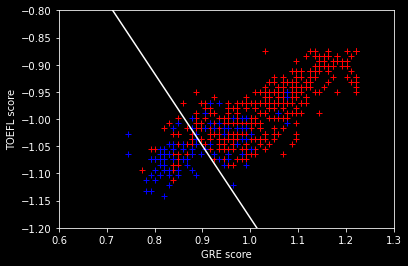

In [17]:
accepted = np.array(X.loc[Y.loc[:,0]==1, :])
rejected = np.array(X.loc[Y.loc[:,0]==0, :])
plt.style.use("dark_background")
plt.plot(accepted[:, 0], accepted[:, 1], "r+")
plt.plot(rejected[:, 0], rejected[:, 1], "b+")

y1 = -1*(W[0]*0.6 + b)/W[1]
y2 = -1*(W[0]*1.3 + b)/W[1]
plt.plot([0.6, 1.3], [y1, y2], "w-")
plt.axis([0.6, 1.3, -1.2, -0.8])
plt.xlabel("GRE score")
plt.ylabel("TOEFL score")

plt.show()